In [1]:
# stacked generalization with linear meta model on blobs dataset
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#x_train  y_train to train
#x_test   y_test to test
#x_valid  y_valid 
#video
import joblib
x_test_prediction = joblib.load('/content/drive/My Drive/fusion/savee/video/data_set/expert5/test/pred_test')
x_train_prediction = joblib.load('/content/drive/My Drive/fusion/savee/video/data_set/expert5/train/pred_train')
x_valid_prediction = joblib.load('/content/drive/My Drive/fusion/savee/video/data_set/expert5/valid/pred_valid')
y_test = joblib.load('/content/drive/My Drive/fusion/savee/audio/data_set/expert5/test/labels_test')
y_train = joblib.load('/content/drive/My Drive/fusion/savee/audio/data_set/expert5/train/labels_train')
y_valid = joblib.load('/content/drive/My Drive/fusion/savee/audio/data_set/expert5/valid/labels_valid')
#audio

x_audio_test_prediction = joblib.load('/content/drive/My Drive/fusion/savee/audio/data_set/expert5/test/predict_test')
x_audio_train_prediction = joblib.load('/content/drive/My Drive/fusion/savee/audio/data_set/expert5/train/predict_train')
x_audio_valid_prediction = joblib.load('/content/drive/My Drive/fusion/savee/audio/data_set/expert5/valid/predict_valid')
"""
#samples name
test_videos= joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/test/video_test_path')
train_videos = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/train/video_train_path')
valid_videos = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/valid/video_valid_path')
"""

"\n#samples name\ntest_videos= joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/test/video_test_path')\ntrain_videos = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/train/video_train_path')\nvalid_videos = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/valid/video_valid_path')\n"

In [4]:
len(x_test_prediction),len(x_train_prediction),len(x_audio_test_prediction),len(x_audio_train_prediction),len(x_valid_prediction),len(x_audio_valid_prediction)

(36, 288, 36, 288, 36, 36)

In [5]:
#x_train for video
x_train_prediction=x_train_prediction.append(x_valid_prediction,ignore_index = True)
#x_train for audio
x_audio_train_prediction=x_audio_train_prediction.append(x_audio_valid_prediction,ignore_index = True)

In [6]:
len(x_audio_train_prediction),len(x_train_prediction)

(324, 324)

In [7]:
from pandas.core.frame import DataFrame
df_train=DataFrame(y_train,columns=['labels'])
df_valid=DataFrame(y_valid,columns=['labels'])

In [8]:
df_train=df_train.append(df_valid,ignore_index = True)

In [9]:
len(df_train)

324

In [10]:
df_train

,labels
0,0
1,0
2,1
3,0
4,0
...,...
319,0
320,0
321,2
322,0


In [11]:
import pandas as pd

x_train = pd.concat([x_train_prediction, x_audio_train_prediction], axis=1,join='inner')
x_test =  pd.concat([x_test_prediction, x_audio_test_prediction], axis=1,join='inner')

In [12]:
x_test

,OV_0,OV_1,OV_2,OV_3,OV_4,OA_0,OA_1,OA_2,OA_3,OA_4
0,2.565738e-06,0.998767,0.000099,0.000555,0.000576,0.003944,6.608150e-01,8.961300e-03,7.172606e-03,3.191067e-01
1,2.272389e-03,0.000143,0.982501,0.000391,0.014694,0.191103,4.042871e-03,8.047240e-01,8.156750e-06,1.223551e-04
2,1.040670e-03,0.000054,0.995807,0.000558,0.002541,0.048007,1.756628e-04,9.517574e-01,4.774321e-05,1.255884e-05
3,7.713222e-04,0.000109,0.994608,0.002242,0.002270,0.000007,1.432306e-05,9.634817e-01,4.704718e-04,3.602682e-02
4,1.214552e-04,0.000630,0.003629,0.001525,0.994095,0.000111,1.927710e-04,9.025123e-02,1.345481e-02,8.959906e-01
5,9.991456e-01,0.000003,0.000626,0.000179,0.000046,0.999093,7.429253e-06,8.220709e-04,7.783047e-05,1.213970e-07
6,9.991415e-01,0.000008,0.000440,0.000349,0.000061,0.994262,3.948539e-05,1.926044e-03,3.766485e-03,5.914830e-06
7,2.092588e-04,0.949203,0.001005,0.012815,0.036768,0.000145,7.663186e-01,9.372991e-05,2.333677e-01,7.493924e-05
8,9.993549e-01,0.000005,0.000390,0.000201,0.000048,0.997173,3.674164e-06,1.888545e-03,9.056437e-04,2.954348e-05
9,7.284032e-04,0.000107,0.993427,0.003525,0.002213,0.003400,5.971597e-04,9.519103e-01,4.212173e-02,1.970944e-03


In [13]:
len(x_test),len(x_train)

(36, 324)

In [14]:
x_train

,OV_0,OV_1,OV_2,OV_3,OV_4,OA_0,OA_1,OA_2,OA_3,OA_4
0,0.999388,0.000004,0.000394,0.000169,0.000045,9.849937e-01,7.393770e-09,0.015006,4.902430e-07,2.291726e-07
1,0.999325,0.000006,0.000390,0.000228,0.000051,9.318291e-01,9.415574e-06,0.067353,7.786009e-04,2.949001e-05
2,0.000003,0.997462,0.000155,0.001515,0.000864,2.867992e-07,9.996512e-01,0.000003,3.144470e-04,3.134005e-05
3,0.999366,0.000004,0.000395,0.000195,0.000041,8.648250e-01,9.141753e-05,0.130960,4.036297e-03,8.695089e-05
4,0.999339,0.000004,0.000458,0.000151,0.000047,9.258037e-01,2.439553e-03,0.065541,4.994650e-03,1.221318e-03
...,...,...,...,...,...,...,...,...,...,...
319,0.999353,0.000004,0.000471,0.000132,0.000040,9.717730e-01,4.115469e-04,0.026844,8.962305e-04,7.517183e-05
320,0.999249,0.000004,0.000491,0.000209,0.000047,9.993989e-01,6.698403e-06,0.000415,1.787523e-04,1.747262e-07
321,0.000947,0.000039,0.997180,0.000205,0.001629,4.173325e-07,4.265615e-07,0.999252,3.370917e-06,7.433239e-04
322,0.999233,0.000003,0.000600,0.000110,0.000054,4.365204e-01,6.289433e-04,0.509436,4.692512e-03,4.872253e-02


In [15]:
from sklearn.utils import shuffle
seed=42
new_x_train = shuffle(x_train,random_state=seed)
new_y_train = shuffle(df_train,random_state=seed)
new_x_train = new_x_train.reset_index(drop=True)
new_y_train = new_y_train.reset_index(drop=True)
"""
y_train=df_train.to_numpy()
y_train=y_train.reshape(1860,)
y_train, y_train.shape
"""

'\ny_train=df_train.to_numpy()\ny_train=y_train.reshape(1860,)\ny_train, y_train.shape\n'

In [16]:
len(new_y_train)

324

In [17]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
new_x_train = scaler.fit_transform(new_x_train)
X_test = scaler.transform(x_test)

In [19]:
y_train=df_train.to_numpy()
y_train=y_train.reshape(324,)
y_train, y_train.shape

(array([0, 0, 1, 0, 0, 2, 1, 4, 0, 4, 1, 2, 4, 0, 4, 1, 3, 3, 0, 3, 4, 1,
        3, 3, 0, 0, 4, 1, 2, 3, 4, 0, 0, 1, 3, 4, 1, 3, 2, 3, 3, 0, 4, 0,
        4, 1, 2, 0, 4, 0, 0, 2, 2, 0, 4, 0, 0, 1, 3, 2, 4, 2, 1, 1, 2, 1,
        3, 3, 4, 3, 0, 2, 2, 0, 0, 0, 0, 1, 4, 0, 3, 3, 0, 0, 0, 2, 4, 3,
        0, 1, 2, 3, 0, 4, 0, 2, 1, 1, 2, 4, 4, 1, 3, 4, 4, 2, 2, 2, 1, 0,
        0, 4, 3, 0, 0, 3, 3, 3, 4, 0, 0, 1, 4, 1, 1, 2, 3, 1, 1, 1, 3, 2,
        2, 0, 4, 1, 1, 0, 0, 4, 2, 1, 2, 2, 4, 4, 4, 2, 0, 4, 0, 1, 0, 0,
        3, 3, 3, 3, 0, 2, 2, 4, 0, 3, 3, 3, 0, 0, 0, 0, 1, 3, 0, 0, 0, 3,
        3, 0, 4, 2, 4, 1, 1, 2, 4, 0, 0, 0, 0, 0, 4, 1, 0, 3, 0, 4, 2, 3,
        1, 0, 4, 0, 0, 0, 0, 0, 1, 3, 4, 0, 0, 1, 2, 0, 3, 2, 0, 0, 0, 1,
        2, 2, 2, 0, 1, 2, 4, 2, 3, 1, 0, 1, 1, 0, 1, 0, 4, 0, 1, 0, 0, 2,
        2, 0, 1, 4, 4, 0, 0, 0, 3, 0, 0, 4, 0, 2, 1, 0, 4, 4, 2, 0, 1, 2,
        4, 4, 0, 2, 0, 3, 3, 3, 0, 0, 0, 3, 3, 2, 4, 4, 2, 3, 3, 2, 1, 0,
        3, 0, 1, 1, 0, 0, 4, 1, 2, 2, 

# training machine learning

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np


#print("Restored model, accuracy: {:5.2f}%".format(100*acc))
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(new_x_train,new_y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [21]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 1}

In [22]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

1.0

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
knn = KNeighborsClassifier(n_neighbors=1)
kn=knn.fit(new_x_train,new_y_train)
predictions = knn.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [24]:
predictions

array([1, 2, 2, 2, 4, 0, 0, 1, 0, 2, 2, 0, 0, 0, 0, 1, 3, 4, 4, 0, 3, 4,
       3, 1, 3, 1, 2, 0, 0, 3, 3, 3, 0, 2, 2, 4])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.83      0.91         6
           2       1.00      1.00      1.00         8
           3       0.86      1.00      0.92         6
           4       1.00      1.00      1.00         5

    accuracy                           0.97        36
   macro avg       0.97      0.97      0.97        36
weighted avg       0.98      0.97      0.97        36

----accuracy score 97.22222222222221 ----


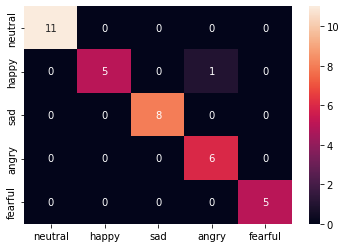

In [25]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import seaborn as sn
import matplotlib.pyplot as plt

print(classification_report(y_test,predictions))

acc = float(accuracy_score(y_test,predictions))*100
print("----accuracy score %s ----" % acc)

cm = confusion_matrix(y_test,predictions)
#df_cm = pd.DataFrame(cm)
class_names = ['neutral','happy','sad','angry', 'fearful' ]
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names,)
sn.heatmap(df_cm, annot=True, fmt='')
plt.show()

In [26]:
path='/content/drive/My Drive/fusion/savee_fusion_model/KNN/expert5'
savedvX = joblib.dump(knn, path)

print("MODEL SAVED")

MODEL SAVED
